In [8]:
import torch 
from torch.nn import functional as F
from torch.autograd import Variable
import torch.utils.data as Data
import matplotlib.pyplot as plt


%matplotlib inline

* 优化器: SGD  Momentum  RMSprop  Adam

### 1.伪数据
* 为了对比各种优化器的效果, 我们需要有一些数据, 还是自己编一些伪数据

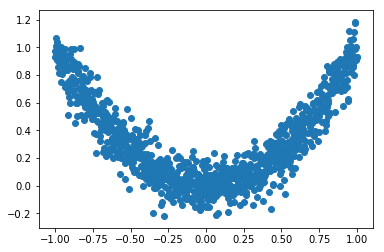

In [31]:
# torch.manual_seed(1)

LR = 0.01
BATCH_SIZE = 32
EPOCH = 12

x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim=1)
y = x.pow(2) + 0.1 * torch.normal(torch.zeros(x.size()))

plt.scatter(x.numpy(), y.numpy())


torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(dataset=torch_dataset, 
                         batch_size=BATCH_SIZE, 
                         shuffle=True, 
                         num_workers=2,
                        )



### 2.每个优化器优化一个神经网络
* 为了对比每一种优化器, 我们给他们各自创建一个神经网络, 但这个神经网络都来自同一个 Net 形式.

In [33]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(1, 20)
        self.prediction = torch.nn.Linear(20, 1)
    
    
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.prediction(x)
        return x

In [34]:
# 为每个优化器创建一个 net
net_SGD         = Net()
net_Momentum    = Net()
net_RMSprop     = Net()
net_Adam        = Net()
nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

### 3.优化器 Optimizer
* 接下来在创建不同的优化器, 用来训练不同的网络. 并创建一个 loss_func  用来计算误差. 我们用几种常见的优化器, SGD , Momentum , RMSprop , Adam .

In [35]:
opt_SGD = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
opt_RMSprop = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)
opt_Adam = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))
optimzers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

In [36]:
loss_func = torch.nn.MSELoss()
losses_his = [[], [], [], []]  # 记录 training 时不同神经网络的 loss


### 4.训练/出图

epoch:  0
epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5
epoch:  6
epoch:  7
epoch:  8
epoch:  9
epoch:  10
epoch:  11


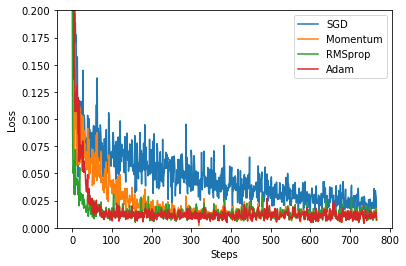

In [43]:
for epoch in range(EPOCH):
    print("epoch: ", epoch)
    for step, (batch_x, batch_y) in enumerate(loader):
        for net, opt, l_his in zip(nets, optimzers, losses_his):
            output = net(batch_x)
            loss = loss_func(output, batch_y)
            opt.zero_grad()
            loss.backward()
            opt.step()
            l_his.append(loss.data.numpy())
# 画图
labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
for i, l_his in enumerate(losses_his):
    plt.plot(l_his, label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.2))
plt.show()




            
            
        
        